In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphing 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


In [3]:
df = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


# Let's Start analyzing it

**Pie Chart of Sex**

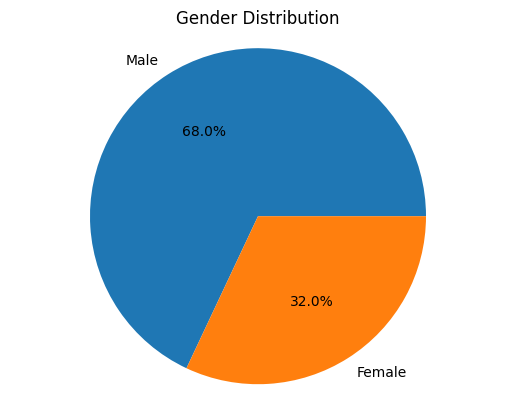

In [5]:
sex_counts = df['Gender'].value_counts()
sex_counts = df['Gender'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Review Ratings

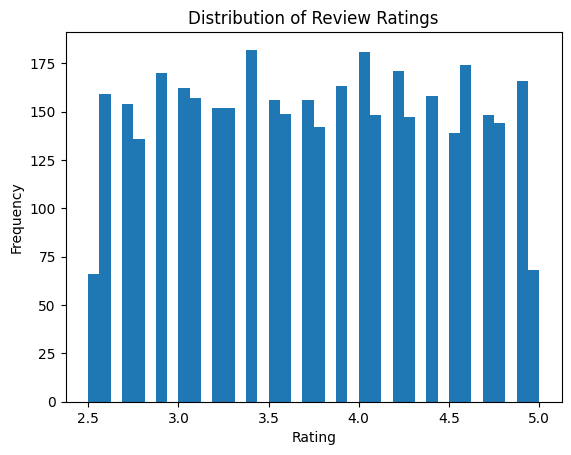

In [23]:
plt.hist(df['Review Rating'], bins=40)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings')
plt.show()

# Size, Category and Season data

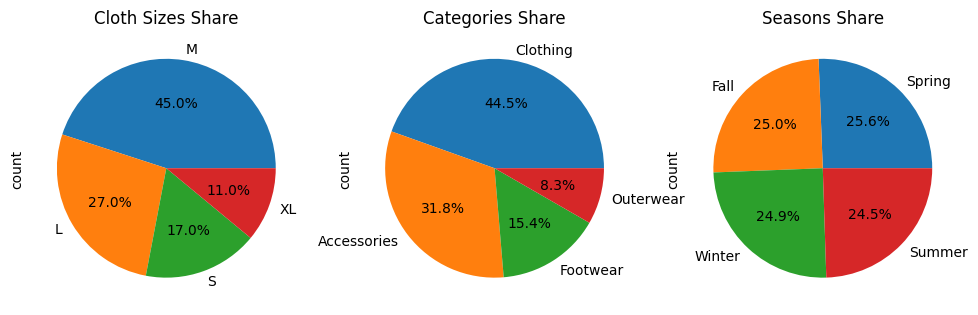

In [19]:
size_counts = df['Size'].value_counts()
category_counts = df['Category'].value_counts()
season_counts = df['Season'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(12, 7))

size_counts.plot(kind='pie', autopct="%1.1f%%", ax=axs[0])
category_counts.plot(kind='pie', autopct="%1.1f%%", ax=axs[1])
season_counts.plot(kind='pie', autopct="%1.1f%%", ax=axs[2])

axs[0].set_title('Cloth Sizes Share')
axs[1].set_title('Categories Share')
axs[2].set_title('Seasons Share')

plt.show()

# Seasons and Colors

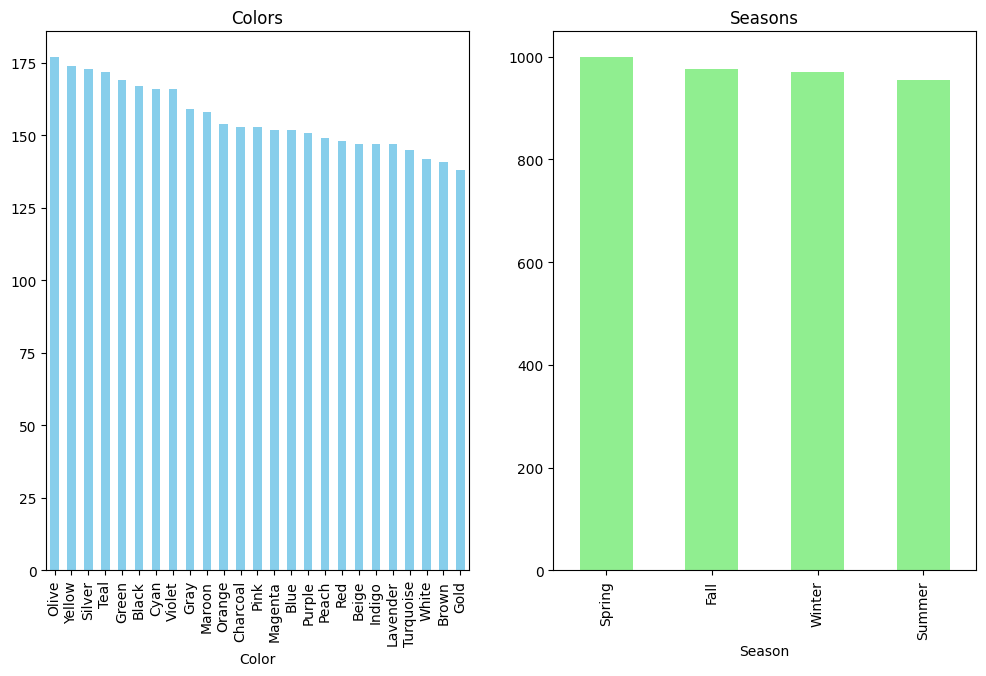

In [17]:
season_counts = df['Season'].value_counts()
color_counts = df['Color'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 7))

color_counts.plot(kind='bar', color='skyblue', ax=axs[0])
season_counts.plot(kind='bar', color='lightgreen', ax=axs[1])

axs[0].set_title('Colors')
axs[1].set_title('Seasons')

plt.show()

# Payment, Shipment, Frequency of purchases

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

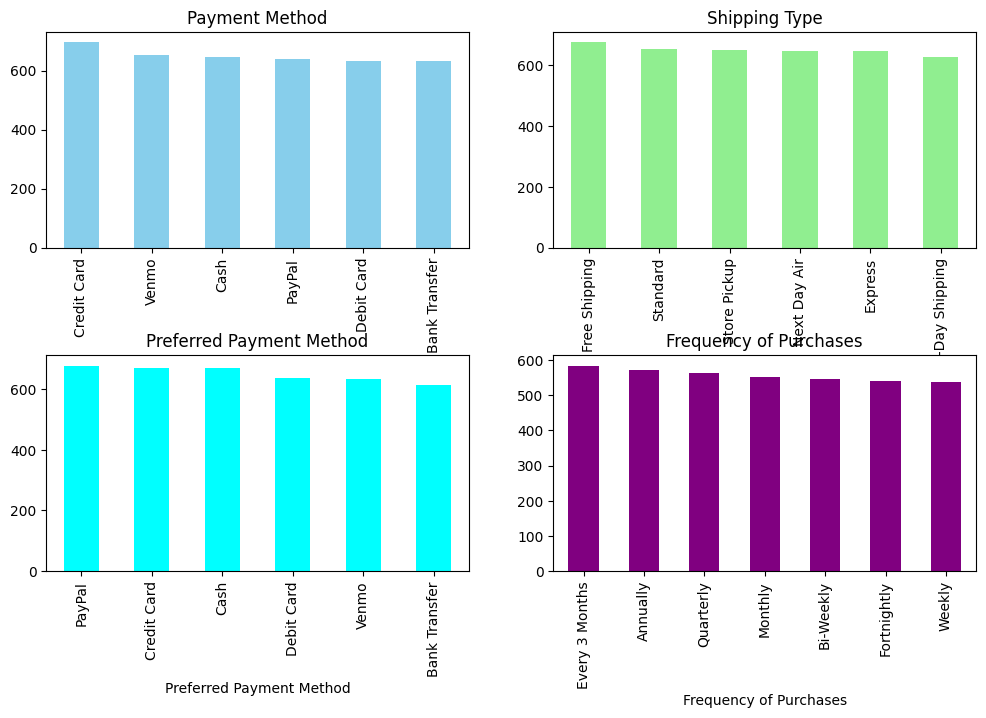

In [31]:
payment_method_counts = df['Payment Method'].value_counts()
shipping_counts = df['Shipping Type'].value_counts()
payment_pref = df['Preferred Payment Method'].value_counts()
frequency_purchase_counts = df['Frequency of Purchases'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 7))

payment_method_counts.plot(kind='bar', color='skyblue', ax=axs[0, 0])
shipping_counts.plot(kind='bar', color='lightgreen', ax=axs[0, 1])
payment_pref.plot(kind='bar', color='cyan', ax=axs[1, 0])
frequency_purchase_counts.plot(kind='bar', color='purple', ax=axs[1, 1])

axs[0, 0].set_title('Payment Method')
axs[0, 1].set_title('Shipping Type')
axs[1, 0].set_title('Preferred Payment Method')
axs[1, 1].set_title('Frequency of Purchases')

plt.subplots_adjust(hspace=0.5)
plt.show()